# Logistic Regression Demo
使用`numpy`来实现一个简单的逻辑回归demo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 一、生成数据集

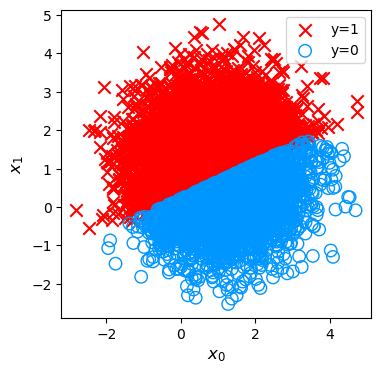

[1.27752275 0.60828552] 0.0
[0.25580088 1.16163102] 1.0


In [2]:
def generate_dataset(w, b, nums):
    x = np.random.normal(1, 1, (nums, len(w)))
    y_hat = np.matmul(x, w) + b
    y_hat += np.random.normal(0, 0.01, y_hat.shape)

    y = np.zeros(y_hat.shape)
    for i in range(len(y_hat)):
        if y_hat[i] >= 0:
            y[i] = 1.0

    return x, y


def plot_data(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    pos = y == 1
    neg = y == 0

    # Plot examples
    ax.scatter(x[pos, 0], x[pos, 1], marker="x", s=80, c="red", label="y=1")
    ax.scatter(
        x[neg, 0],
        x[neg, 1],
        marker="o",
        s=80,
        label="y=0",
        facecolors="none",
        edgecolors="#0096ff",
        lw=1,
    )
    ax.legend(loc="best")
    ax.set_xlabel("$x_0$", fontsize=12)
    ax.set_ylabel("$x_1$", fontsize=12)

    plt.show()


true_w = np.array([-4.2, 9.3])
true_b = -2.0

x, y = generate_dataset(true_w, true_b, 10000)

plot_data(x, y)

print(x[0], y[0])
print(x[300], y[300])

## 二、初始化参数

In [3]:
batch_size = 10
lr = 0.1

w = np.ones(true_w.shape)
b = 0.0


def sigmoid(z):
    z = np.clip(z, -500, 500)  # protect against overflow
    g = 1.0 / (1.0 + np.exp(-z))

    return g

## 三、读取数据集

In [4]:
def data_iter(batch_size, x, y):
    num_examples = len(x)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    np.random.shuffle(indices)

    batch_idx = 0
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i : min(i + batch_size, num_examples)])
        batch_idx += 1

        yield batch_idx, x[batch_indices], y[batch_indices]

## 四、梯度下降

In [5]:
def compute_gradient(x_batch, y_batch, w, b):
    m, n = x_batch.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(x_batch[i], w) + b)
        err_i = f_wb_i - y_batch[i]
        for j in range(n):
            dj_dw[j] += err_i * x_batch[i, j]
        dj_db += err_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


def gradient_descent(w, b, x_batch, y_batch):
    batch_size = len(x_batch)

    for i in range(batch_size):
        dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
        w -= lr * dj_dw
        b -= lr * dj_db

    return w, b

## 五、训练模型

10 batches: cost: 0.22766268
20 batches: cost: 0.20049437
30 batches: cost: 0.11085449
40 batches: cost: 0.15616244
50 batches: cost: 0.1131084
60 batches: cost: 0.15273484
70 batches: cost: 0.13796502
80 batches: cost: 0.18281292
90 batches: cost: 0.12525407
100 batches: cost: 0.028134195
110 batches: cost: 0.021822646
120 batches: cost: 0.1080547
130 batches: cost: 0.14601786
140 batches: cost: 0.18563312
150 batches: cost: 0.086261528
160 batches: cost: 0.048165916
170 batches: cost: 0.12198778
180 batches: cost: 0.18035191
190 batches: cost: 0.074812849
200 batches: cost: 0.12140006
210 batches: cost: 0.060649133
220 batches: cost: 0.17088768
230 batches: cost: 0.042052962
240 batches: cost: 0.086087476
250 batches: cost: 0.15932287
260 batches: cost: 0.067095491
270 batches: cost: 0.0088434527
280 batches: cost: 0.063064193
290 batches: cost: 0.044340605
300 batches: cost: 0.04287384
310 batches: cost: 0.018981442
320 batches: cost: 0.1290124
330 batches: cost: 0.030348184
340 bat

/var/folders/4c/8rs5v44d15z4srf4lh04yl1m0000gn/T/ipykernel_65474/1222190486.py:10: RuntimeWarning: divide by zero encountered in log
  cost += -y_batch[i] * np.log(f_wb_i) - (1 - y_batch[i]) * np.log(1 - f_wb_i)
/var/folders/4c/8rs5v44d15z4srf4lh04yl1m0000gn/T/ipykernel_65474/1222190486.py:10: RuntimeWarning: invalid value encountered in double_scalars
  cost += -y_batch[i] * np.log(f_wb_i) - (1 - y_batch[i]) * np.log(1 - f_wb_i)



680 batches: cost: 0.10557313
690 batches: cost: 0.079161954
700 batches: cost: 0.07881957
710 batches: cost: 0.03246541
720 batches: cost: 0.011878777
730 batches: cost: 0.066713221
740 batches: cost: 0.057947499
750 batches: cost: 0.071845162
760 batches: cost: 0.0085532991
770 batches: cost: 0.06667769
780 batches: cost: 0.067114759
790 batches: cost: 0.079189525
800 batches: cost: 0.041037824
810 batches: cost: 0.031218694
820 batches: cost: 0.04621446
830 batches: cost: 0.0010917676
840 batches: cost: 0.0044595135
850 batches: cost: 0.011240523
860 batches: cost: 0.054143476
870 batches: cost: 0.061689629
880 batches: cost: nan
890 batches: cost: 0.0041921925
900 batches: cost: 0.028710506
910 batches: cost: 0.050636732
920 batches: cost: 0.030415911
930 batches: cost: 0.030379522
940 batches: cost: 0.063940226
950 batches: cost: 0.0013109107
960 batches: cost: 0.051981578
970 batches: cost: 0.019019086
980 batches: cost: 0.032865563
990 batches: cost: 0.018957056
1000 batches: c

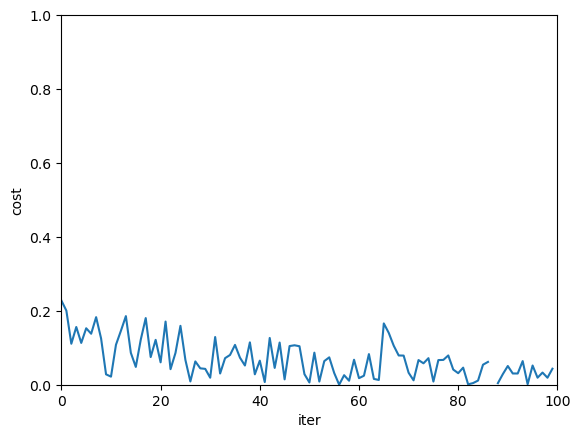

In [6]:
cost_y = []

def cost_function(x_batch, y_batch, w, b):
    m = len(x_batch)

    cost = 0

    for i in range(m):
        f_wb_i = sigmoid(np.matmul(x_batch[i], w) + b)
        cost += -y_batch[i] * np.log(f_wb_i) - (1 - y_batch[i]) * np.log(1 - f_wb_i)

    return cost / m


for idx, x_batch, y_batch in data_iter(batch_size, x, y):
    w, b = gradient_descent(w, b, x_batch, y_batch)
    cost = cost_function(x_batch, y_batch, w, b)

    if idx % 10 == 0:
        cost_y.append(cost)
        print(f"{idx} batches: cost:{cost: 0.8}")


plt.plot(cost_y)
plt.xlabel("iter")
plt.ylabel("cost")
plt.axis([0, 100, 0, 1])
plt.show()

## 六、比较参数

In [7]:
print(f"origin params: {true_w}", f"{true_b: 0.3}")
print(f"model params: {w}", f"{b: 0.3}")

test_count = 10000
x_test, y_test = generate_dataset(true_w, true_b, test_count)

def generate_testset(x, w, b, nums):
    y_hat = np.matmul(x, w) + b
    y_hat += np.random.normal(0, 0.01, y_hat.shape)

    y = np.zeros(y_hat.shape)
    for i in range(len(y_hat)):
        if y_hat[i] >= 0:
            y[i] = 1.0

    return y

y_result = generate_testset(x_test, w, b, test_count)

count = 0
for i in range(test_count):
    if y_test[i] == y_result[i]:
        count += 1

print(f"accuracy: {count * 100 / test_count}%")

origin params: [-4.2  9.3] -2.0
model params: [-5.00145666 10.86975825] -1.94
accuracy: 98.97%
